In [2]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
%matplotlib inline
import re_stock_tool


In [3]:
CITY = 'Los Angeles'
re_stock_tool.get_city_list()

0          Los Angeles
1              Houston
2              Chicago
3          San Antonio
4         Philadelphia
5            Las Vegas
6            San Diego
7               Dallas
8               Austin
9             San Jose
10        Jacksonville
11        Indianapolis
12       San Francisco
13           Charlotte
14          Fort Worth
15            Columbus
16          Louisville
17             Orlando
18             El Paso
19              Denver
20             Seattle
21             Memphis
22              Boston
23          Washington
24            Portland
25           Nashville
26          Sacramento
27           Milwaukee
28              Fresno
29               Omaha
30         Albuquerque
31       Oklahoma City
32             Raleigh
33               Miami
34             Atlanta
35         Kansas City
36    Colorado Springs
37          Long Beach
38      Virginia Beach
39             Oakland
Name: RegionName, dtype: object

## Using Custom Tool

In order to support faster exploratory analysis and data processing a seperate Python module was created called **re_stock_tool**, which stands for Real Estate & Stock Tool.

After importing the module above one can use the help function to examine the contents of the functions available to the user.

In [4]:
# help(re_stock_tool)

## Exploring SP 500 and Real Estate Returns

In [5]:
sp500 = re_stock_tool.get_sp_500()
sp500.reset_index(inplace=True)
sp500.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,year,month
2447,2019-09-24,3007.979980,2957.729980,3002.429932,2966.600098,3868160000,2966.600098,2019,9
2448,2019-09-25,2989.820068,2952.860107,2968.350098,2984.870117,3318870000,2984.870117,2019,9
2449,2019-09-26,2987.280029,2963.709961,2985.729980,2977.620117,3077240000,2977.620117,2019,9
2450,2019-09-27,2987.310059,2945.530029,2985.469971,2961.790039,3243650000,2961.790039,2019,9
2451,2019-09-30,2983.850098,2967.070068,2967.070068,2981.840088,741425990,2981.840088,2019,9


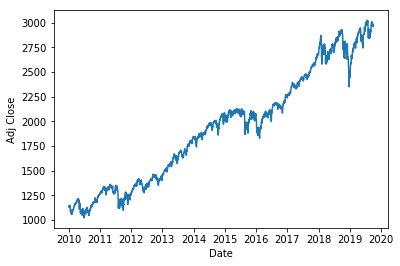

In [6]:
sns.lineplot(x="Date", y="Adj Close", data=sp500)

In [7]:
home_prices = pd.DataFrame(re_stock_tool.prep_zillow(mycsv='City_Zhvi_3bedroom', value_name='home_price'))
home_prices.reset_index(inplace=True)



* Both Real Estate and Stocks have enjoyed an upward trends since 2011
* Though the Stock Market gains have been more volatile

## Merging City Returns and sp500 Stock Returns By Month

In [8]:
returns = re_stock_tool.merge_data(city=CITY)

In [9]:
returns.tail()

,year,month,Metro,return_realestate,return_sp500
110,2019,3,Los Angeles-Long Beach-Anaheim,-0.002426,0.010953
111,2019,4,Los Angeles-Long Beach-Anaheim,-0.001064,0.027428
112,2019,5,Los Angeles-Long Beach-Anaheim,0.000456,-0.058716
113,2019,6,Los Angeles-Long Beach-Anaheim,-0.000760,0.071894
114,2019,7,Los Angeles-Long Beach-Anaheim,-0.001218,0.005414


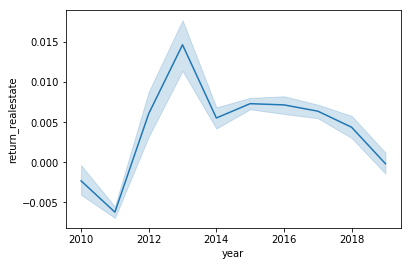

In [10]:
sns.lineplot(x="year", y="return_realestate", data=returns)

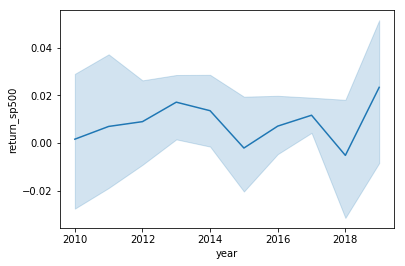

In [11]:
sns.lineplot(x="year", y="return_sp500", data=returns)

In [12]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
year,115.0,2014.304348,2.785218,2010.000000,2012.000000,2014.000000,2017.000000,2019.000000
month,115.0,6.347826,3.448985,1.000000,3.000000,6.000000,9.000000,12.000000
return_realestate,115.0,0.004473,0.006429,-0.008689,0.001109,0.005215,0.007830,0.021234
return_sp500,115.0,0.007589,0.036672,-0.101607,-0.011502,0.011204,0.026938,0.140162


* Mean Return for sp500 is almost twice as high as real estate (see column mean above and rows with 'return')
* However the returns to the sp500 are also much more volatile as seen by the std column for rows with 'returns')
* Comparing the distribution plots of monthly returns, it is easy to see that the returns to the SP500 vary more than those of real estate 

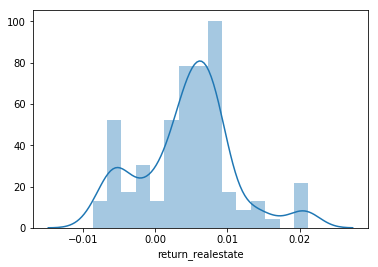

In [13]:
sns.distplot(returns['return_realestate'], bins=15)

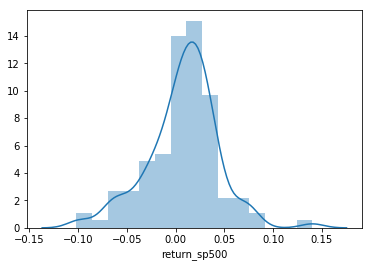

In [14]:
sns.distplot(returns['return_sp500'], bins=15)

## IF Low Correlation Between RE and Stocks = Diversification is Possible to Reduce Risks

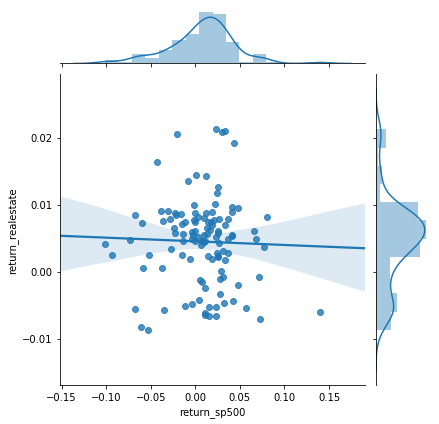

In [15]:
sns.jointplot(x='return_sp500',y='return_realestate',data=returns,kind='reg')

## Yearly Deviations Also Support the Case for Diversification

* 2016 was a great year for real estate in Los Angeles, and somewhat average for the stock market
* 2019 was not that great for home appreciation but the stock market growth was very impressive

Diversifying across stocks and real estate can help smooth out the bumpiness of stock investments

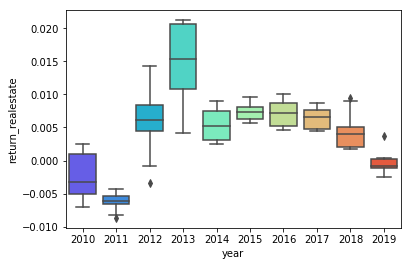

In [16]:
sns.boxplot(x="year", y="return_realestate", data=returns,palette='rainbow')

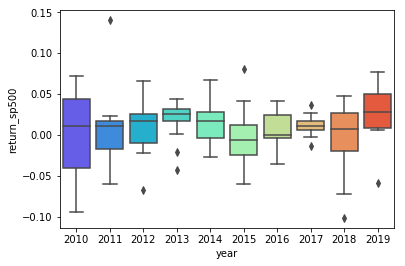

In [17]:
sns.boxplot(x="year", y="return_sp500", data=returns,palette='rainbow')

In [18]:
re_stock_tool.main(city='Los Angeles', desired_returns=.095)

,count,mean,std,min,25%,50%,75%,max
mean,48.0,0.007229,0.000221,0.006900,0.007075,0.007200,0.007400,0.00760
std,48.0,0.032258,0.002578,0.028000,0.030125,0.032250,0.034400,0.03650
weight_realestate,48.0,0.116150,0.070654,0.000000,0.058075,0.116150,0.174225,0.23230
weight_stocks,48.0,0.883850,0.070654,0.767700,0.825775,0.883850,0.941925,1.00000
annual_mean,48.0,0.090287,0.002873,0.086016,0.088283,0.089905,0.092505,0.09511


In [19]:
re_stock_tool.main(city='Las Vegas', desired_returns=.095)

,count,mean,std,min,25%,50%,75%,max
mean,110.0,0.007227,0.000215,0.006900,0.007025,0.007200,0.007400,0.00760
std,110.0,0.026889,0.005606,0.017600,0.022000,0.026800,0.031700,0.03650
weight_realestate,110.0,0.272709,0.161081,0.000000,0.133825,0.272700,0.411575,0.54550
weight_stocks,110.0,0.727291,0.161081,0.454500,0.588425,0.727300,0.866175,1.00000
annual_mean,110.0,0.090262,0.002787,0.086016,0.087635,0.089905,0.092505,0.09511


In [20]:
re_stock_tool.main(city='San Francisco', desired_returns=.095)

,count,mean,std,min,25%,50%,75%,max
mean,96.0,0.007223,0.000218,0.006900,0.007000,0.007200,0.007400,0.00760
std,96.0,0.027987,0.005020,0.019600,0.023725,0.027950,0.032200,0.03650
weight_realestate,96.0,0.237350,0.140654,0.000000,0.118675,0.237350,0.356025,0.47470
weight_stocks,96.0,0.762650,0.140654,0.525300,0.643975,0.762650,0.881325,1.00000
annual_mean,96.0,0.090206,0.002836,0.086016,0.087311,0.089905,0.092505,0.09511


In [21]:
re_stock_tool.main(city='Chicago', desired_returns=.095)

,count,mean,std,min,25%,50%,75%,max
mean,26.0,0.007223,0.000230,0.006900,0.007000,0.007200,0.007400,0.00760
std,26.0,0.034300,0.001397,0.032100,0.033200,0.034300,0.035400,0.03650
weight_realestate,26.0,0.060600,0.038539,0.000000,0.030300,0.060600,0.090900,0.12120
weight_stocks,26.0,0.939400,0.038539,0.878800,0.909100,0.939400,0.969700,1.00000
annual_mean,26.0,0.090208,0.002992,0.086016,0.087311,0.089905,0.092505,0.09511


In [23]:
re_stock_tool.main(city='West New York', desired_returns=.095)

,count,mean,std,min,25%,50%,75%,max
mean,30.0,0.007227,0.000221,0.006900,0.007025,0.007200,0.007400,0.00760
std,30.0,0.033847,0.001658,0.031200,0.032400,0.033800,0.035300,0.03650
weight_realestate,30.0,0.070700,0.044383,0.000000,0.032825,0.070700,0.108575,0.14140
weight_stocks,30.0,0.929300,0.044383,0.858600,0.891425,0.929300,0.967175,1.00000
annual_mean,30.0,0.090255,0.002873,0.086016,0.087635,0.089905,0.092505,0.09511
